In [11]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import neattext.functions as nfx

import nltk
nltk.download('punkt')

In [4]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/gabrielpreda/covid-19-tweets/master/covid19_tweets.csv")

## Dataset Overview

In [5]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


## Data Cleaning

From the above dataset, to perform data preprocessing and sentiment analysis, we will be using the `text` column.

In [8]:
df['text']

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

In [12]:
# Remove hashtags
df['clean_tweets'] = df['text'].apply(nfx.remove_hashtags)

In [13]:
# Remove user handles
df['clean_tweets'] = df['clean_tweets'].apply(nfx.remove_userhandles)

In [14]:
# Remove extra spaces
df['clean_tweets'] = df['clean_tweets'].apply(nfx.remove_multiple_spaces)

In [15]:
# Remove URLs
df['clean_tweets'] = df['clean_tweets'].apply(nfx.remove_urls)

In [16]:
df[['text', 'clean_tweets']]

,text,clean_tweets
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and - wouldn't it have made more sense to ...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax. We all c...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challenge. I ...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol!
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena. It's a tr...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for at ..."


## Sentiment Assignment

In [19]:
from textblob import TextBlob

In [20]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity # 0-1 sentiment label
    sentiment_subjectivity = blob.sentiment.subjectivity
    
    if sentiment_polarity > 0:
        sentiment_label = "Positive"
    elif sentiment_polarity < 0:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"
    
    result = {"polarity": sentiment_polarity, 
              "subjectivity": sentiment_subjectivity, 
              "sentiment": sentiment_label}
    
    return result

In [21]:
# Example for execution of above function to get sentiment
example = df['clean_tweets'].iloc[0]
print(get_sentiment(example))

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}


In [22]:
# Getting sentiment for the clean_tweets dataframe
df['sentiment_results'] = df['clean_tweets'].apply(get_sentiment)

In [23]:
df['sentiment_results']

0         {'polarity': -0.25, 'subjectivity': 0.25, 'sen...
1         {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...
2         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3         {'polarity': 0.0, 'subjectivity': 0.3571428571...
4         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                                ...                        
179103    {'polarity': 0.2, 'subjectivity': 0.2, 'sentim...
179104    {'polarity': 1.0, 'subjectivity': 0.7, 'sentim...
179105    {'polarity': 0.3, 'subjectivity': 1.0, 'sentim...
179106    {'polarity': 0.26325757575757575, 'subjectivit...
179107    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 179108, dtype: object

In [24]:
# Making a dataframe out of df['sentiment_results']
df = df.join(pd.json_normalize(df['sentiment_results']))

## Twitter Data Analysis

In [25]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_tweets,sentiment_results,polarity,subjectivity,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,If I smelled the scent of hand sanitizers toda...,"{'polarity': -0.25, 'subjectivity': 0.25, 'sen...",-0.25,0.250000,Negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,Hey and - wouldn't it have made more sense to ...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.50,0.500000,Positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,Trump never once claimed was a hoax. We all c...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,The one gift has give me is an appreciation f...,"{'polarity': 0.0, 'subjectivity': 0.3571428571...",0.00,0.357143,Neutral
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 July : Media Bulletin on Novel,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral


### Number of samples with positive, negative and neutral sentiments:

In [26]:
df["sentiment"].value_counts()

Neutral     75509
Positive    74211
Negative    29388
Name: sentiment, dtype: int64

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

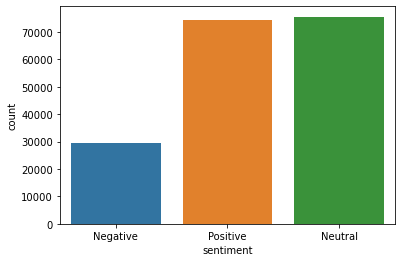

In [27]:
sns.countplot(df["sentiment"])

### Distribution of tweets into positive, negative, neutral:

In [28]:
positive_tweet = df[df["sentiment"] == "Positive"]["clean_tweets"]
neutral_tweet = df[df["sentiment"] == "Neutral"]["clean_tweets"]
negative_tweet = df[df["sentiment"] == "Negative"]["clean_tweets"]

In [31]:
# Remove stopwords
positive_tweet = positive_tweet.apply(nfx.remove_stopwords)
neutral_tweet = neutral_tweet.apply(nfx.remove_stopwords)
negative_tweet = negative_tweet.apply(nfx.remove_stopwords)

In [33]:
# Remove emojis
positive_tweet_list = positive_tweet.apply(nfx.remove_emojis).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_emojis).tolist()
negative_tweet_list = negative_tweet.apply(nfx.remove_emojis).tolist()

## Tokenization

In [37]:
from nltk.tokenize import word_tokenize
pos_tokens = []
for line in positive_tweet_list:
    temp = word_tokenize(line)
    pos_tokens = pos_tokens + temp

In [38]:
neu_tokens = []
for line in neutral_tweet_list:
    temp = word_tokenize(line)
    neu_tokens = neu_tokens + temp

In [39]:
neg_tokens = []
for line in negative_tweet_list:
    temp = word_tokenize(line)
    neg_tokens = neg_tokens + temp

## Keyword Extraction

In [40]:
pos_tokens

['Hey',
 '-',
 'sense',
 'players',
 'pay',
 'respects',
 'A…',
 'Change',
 'Work',
 'General',
 '(',
 'and',
 'recruiting',
 ',',
 'specifically',
 ')',
 'via/',
 'Praying',
 'good',
 'health',
 'recovery',
 '.',
 '—',
 'safe',
 'safe',
 '.',
 'commit',
 'ensure…',
 'Let',
 "'s",
 'protect',
 'real',
 'numbers',
 'climbing',
 'fast',
 'Continent',
 '.',
 'Let',
 "'s",
 'n…',
 'Second',
 'wave',
 'Flanders',
 '..',
 'back',
 'again',
 '...',
 'COVID',
 'Update',
 ':',
 'infection',
 'rate',
 'Florida',
 'following',
 'natural',
 'curve',
 'experts',
 'predicted',
 'initial',
 'cu…',
 'Good',
 'Patriots',
 '!',
 'Volunteer',
 'Election',
 'Judge',
 '.',
 'Polls',
 'open',
 'without…',
 'comprehensive',
 'review',
 '&',
 'amp',
 ';',
 'Analysis',
 ':',
 'key',
 'ways',
 'WASH',
 'help',
 'reduce',
 'transmission…',
 'crosses',
 '2',
 'lakh',
 'mark',
 '1,50,055',
 'ppp',
 'recovered',
 'far',
 '.',
 'positive',
 'today',
 '6988/total…',
 'Actor',
 'father',
 'Mr.G.K.Reddy',
 'tested',
 '

In [ ]:
# Get most common keywords
from collections import Counter
